# Predict number images

[SimpliLearn](https://www.youtube.com/watch?v=XnOAdxOWXWg&t=1936s)

## Import modules

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
from sklearn import metrics
import seaborn as sns
import numpy as np

digits = load_digits()

## Determine the total number of images and labels

In [2]:
print("Image data shape:", digits.data.shape)
print("Label data shape:", digits.target.shape)

Image data shape: (1797, 64)
Label data shape: (1797,)


## Display some images and labels

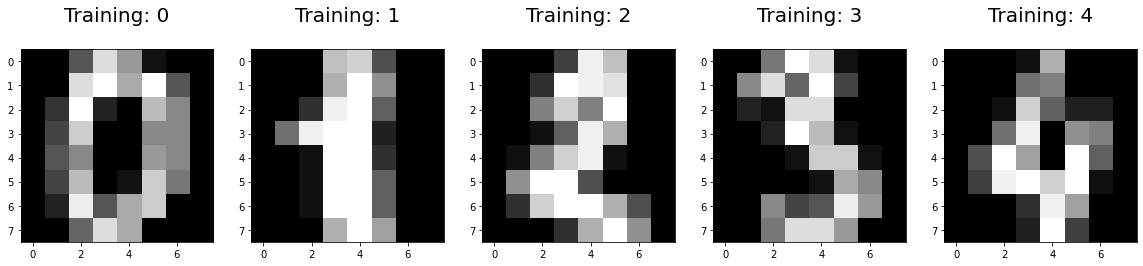

In [3]:
plt.figure(figsize=(20,4))

for idx, (image, label) in enumerate(zip(digits.data[0:5], digits.target[0:5])):
    plt.subplot(1, 5, idx+1)
    plt.imshow(np.reshape(image, (8,8)), cmap=plt.cm.gray)
    plt.title("Training: %i\n" % label, fontsize=20) 

## Divide dataset into training and test set

In [4]:
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.2, random_state=21)

In [5]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((1437, 64), (1437,), (360, 64), (360,))

## Import logistic regression model

In [6]:
from sklearn.linear_model import LogisticRegression

In [9]:
logreg = LogisticRegression(solver='liblinear')
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [11]:
X_test[0]

array([ 0.,  0.,  4., 14.,  6.,  0.,  0.,  0.,  0.,  0., 10., 15.,  2.,
        0.,  0.,  0.,  0.,  0., 16., 11.,  0.,  0.,  0.,  0.,  0.,  0.,
       13., 11.,  0.,  0.,  0.,  0.,  0.,  3., 16., 12.,  8.,  3.,  0.,
        0.,  0.,  2., 16., 14.,  8., 12.,  9.,  0.,  0.,  0., 16., 13.,
        4., 12., 12.,  0.,  0.,  0.,  6., 15., 16., 12.,  1.,  0.])

In [10]:
X_test[0].reshape(1,-1)

array([[ 0.,  0.,  4., 14.,  6.,  0.,  0.,  0.,  0.,  0., 10., 15.,  2.,
         0.,  0.,  0.,  0.,  0., 16., 11.,  0.,  0.,  0.,  0.,  0.,  0.,
        13., 11.,  0.,  0.,  0.,  0.,  0.,  3., 16., 12.,  8.,  3.,  0.,
         0.,  0.,  2., 16., 14.,  8., 12.,  9.,  0.,  0.,  0., 16., 13.,
         4., 12., 12.,  0.,  0.,  0.,  6., 15., 16., 12.,  1.,  0.]])

In [12]:
logreg.predict(X_test[0].reshape(1,-1))

array([6])

## Predict first 10 elements

In [13]:
logreg.predict(X_test[0:10])

array([6, 1, 1, 8, 4, 5, 5, 5, 0, 3])

## Predict entire dataset

In [14]:
predictions = logreg.predict(X_test)

## Determine the accuracy

In [15]:
score = logreg.score(X_test, y_test)
score

0.9722222222222222

## Representating confusion matrix in hotmap

In [20]:
cm = metrics.confusion_matrix(y_test, predictions)
cm

array([[31,  0,  0,  0,  1,  0,  0,  0,  0,  0],
       [ 0, 34,  0,  2,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 29,  1,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 40,  0,  1,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 32,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 46,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 32,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 39,  0,  1],
       [ 0,  2,  0,  0,  0,  0,  0,  0, 40,  0],
       [ 0,  0,  0,  0,  0,  1,  0,  0,  1, 27]], dtype=int64)

Text(0.5, 1.0, 'Accuracy Score: 0.9722222222222222')

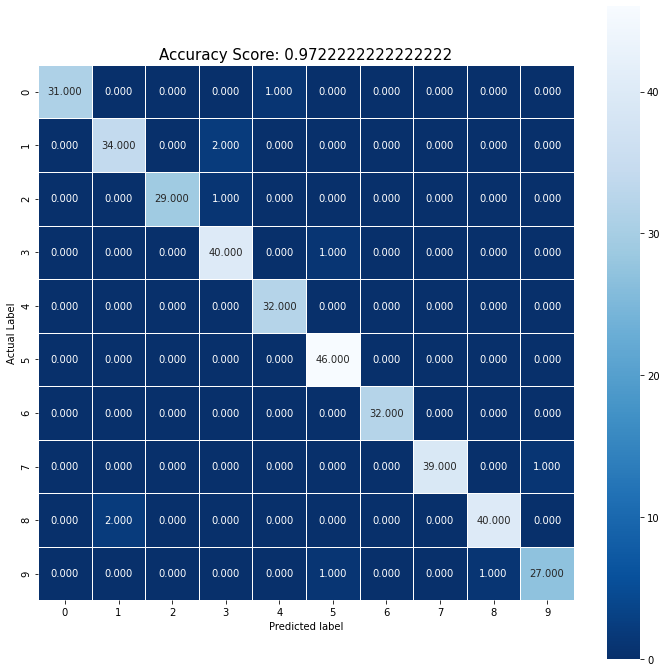

In [21]:
plt.figure(figsize=(12,12))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square=True, cmap='Blues_r')
plt.ylabel('Actual Label')
plt.xlabel("Predicted label")
all_title = "Accuracy Score: {0}".format(score)
plt.title(all_title, size=15)

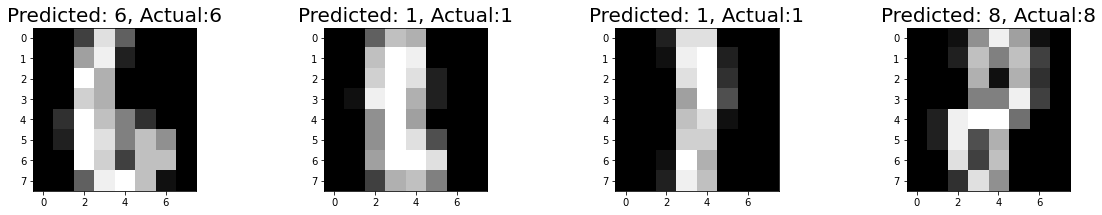

In [22]:
index = 0
classifiedIndex = []
for predict, actual in zip(predictions, y_test):
    if predict == actual:
        classifiedIndex.append(index)
    index += 1
plt.figure(figsize=(20,3))
for plotIndex, wrong in enumerate(classifiedIndex[0:4]):
    plt.subplot(1, 4, plotIndex + 1)
    plt.imshow(np.reshape(X_test[wrong], (8,8)), cmap=plt.cm.gray)
    plt.title("Predicted: {}, Actual:{}".format(predictions[wrong], y_test[wrong]), fontsize=20)